In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

In [8]:
BASE_DIR = "/Users/akshatha/GeorgakopoulosSoaresLab/g4_analysis"
G4_PATH = f"{BASE_DIR}/results/g4hunter_g4_distribution.csv"
REGEX_PATH = f"{BASE_DIR}/results/regex_g4_distribution.csv"

In [9]:
df_g4 = pd.read_csv(G4_PATH)
df_g4 = df_g4[["accession", "g4_count", "total_g4_length"]]

df_reg = pd.read_csv(REGEX_PATH)
df_reg = df_reg[["accession", "g4_count", "total_g4_length"]]

# join the two dataframes on the Accession column
df = pd.merge(df_g4, df_reg, on="accession", suffixes=("_g4hunter", "_regex"))
print(df.head())

# log transform the total G4 length and no. of G4s
df["log10(G4 count (G4Hunter))"] = np.log10(df["g4_count_g4hunter"] + 1)
df["log10(G4 count (Regex))"] = np.log10(df["g4_count_regex"] + 1)
df["log10(Total G4 length (G4Hunter))"] = np.log10(df["total_g4_length_g4hunter"] + 1)
df["log10(Total G4 length (Regex))"] = np.log10(df["total_g4_length_regex"] + 1)

         accession  g4_count_g4hunter  total_g4_length_g4hunter  \
0  GCA_000002515.1                356                     11512   
1  GCA_000002765.3                438                     15119   
2  GCA_000002985.3              11196                    406037   
3  GCA_000006605.1                909                     28761   
4  GCA_000006645.1                765                     23973   

   g4_count_regex  total_g4_length_regex  
0              36                    890  
1             837                  20268  
2            2372                  54608  
3             154                   4017  
4              66                   1652  


[0.2739399 1.923714 ]


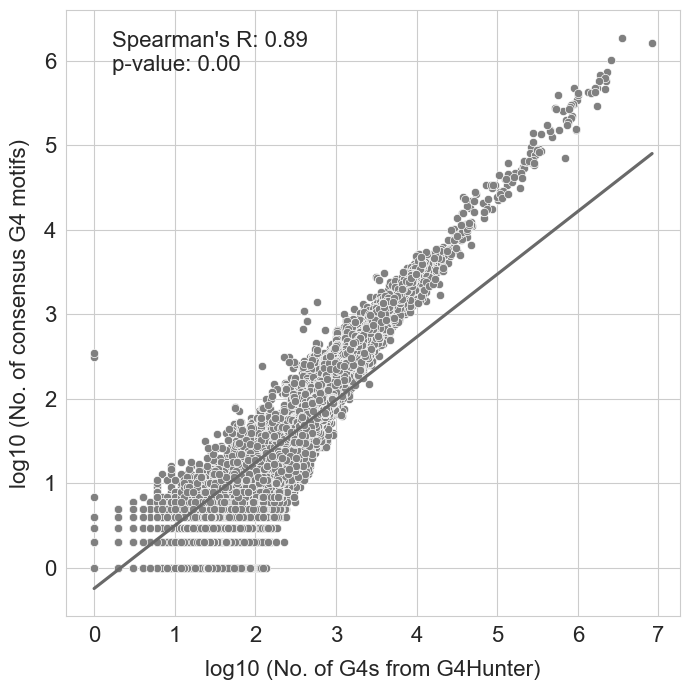

In [19]:
# scatter plot of no. of G4s from G4Hunter vs consensus G4 motifs
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    x="log10(G4 count (G4Hunter))", 
    y="log10(G4 count (Regex))", 
    data=df, 
    color="grey",
)
sns.regplot(
    x="log10(G4 count (G4Hunter))", 
    y="log10(G4 count (Regex))", 
    data=df, 
    scatter=False, 
    color="dimgrey"
)

# formatting
plt.xlabel("log10 (No. of G4s from G4Hunter)", fontsize=16, labelpad=10)
plt.ylabel("log10 (No. of consensus G4 motifs)", fontsize=16, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.ticklabel_format(style='plain')
plt.tight_layout()

# display spearman correlation coefficient
corr, p = spearmanr(df["g4_count_g4hunter"], df["g4_count_regex"])
ax.text(0.075, 0.9, f"Spearman's R: {corr:.2f}\np-value: {p:.2f}", transform=ax.transAxes, fontsize=16)
# display slope and intercept
print(np.polyfit(df['g4_count_g4hunter'], df['g4_count_regex'], 1))

plt.savefig(f"{BASE_DIR}/plots/g4hunter_vs_regex_counts.png")

SignificanceResult(statistic=0.8930352573397075, pvalue=0.0)
[1.73293660e-01 4.81457404e+02]


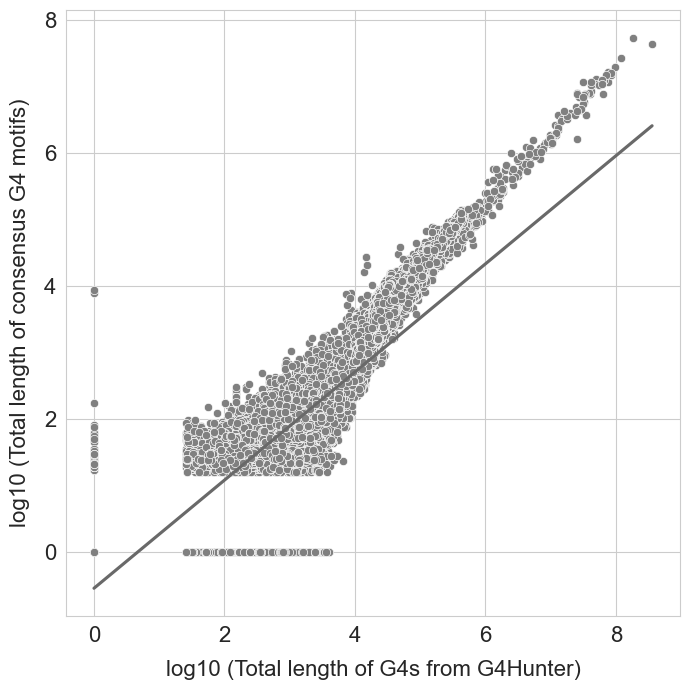

In [11]:
# scatter plot of total G4 length from G4Hunter vs consensus G4 motifs
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    x="log10(Total G4 length (G4Hunter))", 
    y="log10(Total G4 length (Regex))", 
    data=df, 
    color="grey",
)
sns.regplot(
    x="log10(Total G4 length (G4Hunter))", 
    y="log10(Total G4 length (Regex))", 
    data=df, 
    scatter=False, 
    color="dimgrey"
)

# formatting
plt.xlabel("log10 (Total length of G4s from G4Hunter)", fontsize=16, labelpad=10)
plt.ylabel("log10 (Total length of consensus G4 motifs)", fontsize=16, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.ticklabel_format(style='plain')
plt.tight_layout()

# display spearman correlation coefficient
print(spearmanr(df['total_g4_length_g4hunter'], df['total_g4_length_regex']))
# display slope and intercept
print(np.polyfit(df['total_g4_length_g4hunter'], df['total_g4_length_regex'], 1))